In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [40]:
# Load the cleaned DataFrame
cleaned_df = pd.read_csv("/Users/sa18/Desktop/Unsupervised_DJ/Data/cleaned_data.csv")

In [41]:
cleaned_df.head()

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.0
1,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.0
2,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.0
3,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.0
4,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.0


In [42]:
# print out the shape of this dataframe to note the number of samples

cleaned_df.shape

(28362, 17)

# K Means Clustering Without Scaling

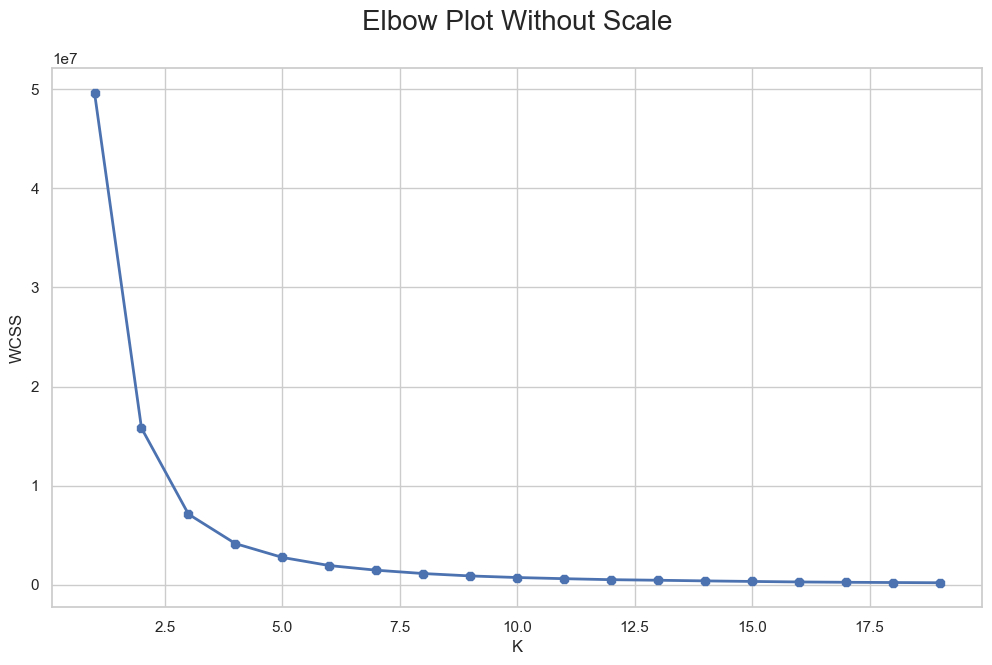

In [43]:
# create an Elbow Plot of WCSS

X1 = cleaned_df.loc[:, ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 
                'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions',
                 'family/spiritual', 'sadness', 'feelings', 'age' ]].values

wcss= []
for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

sns.set(style='whitegrid') # to show gridlines
plt.plot(range(1, 20), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot Without Scale\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

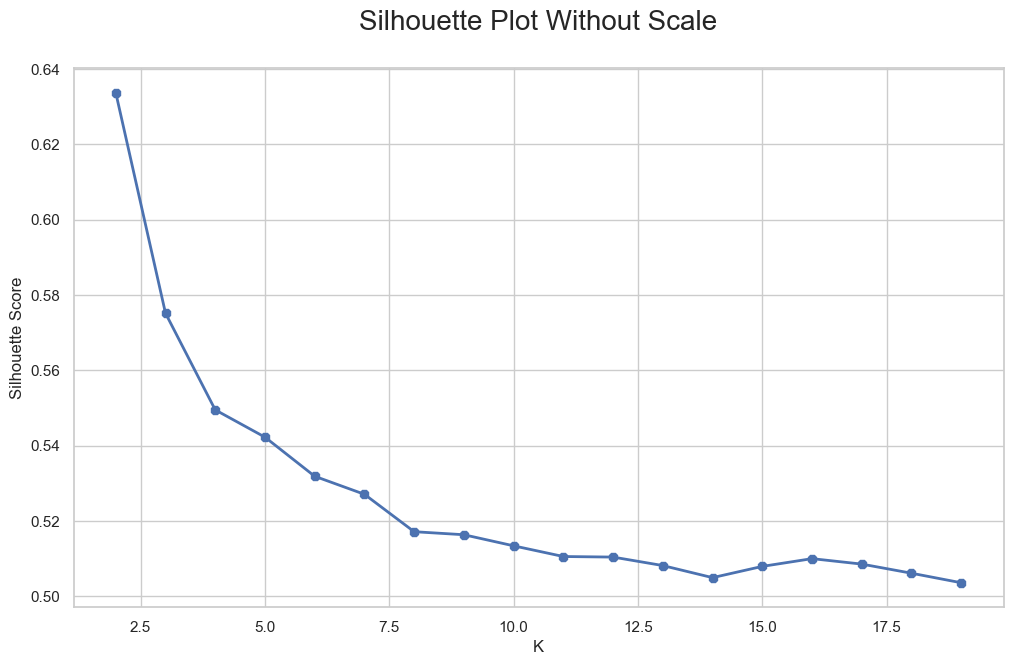

In [44]:
# create a plot of Silhoutte Score

silhouette = []
for k in range(2, 20):
    # create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=42)
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 20), silhouette, linewidth = 2, marker = '8')
plt.title('Silhouette Plot Without Scale\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

The Elbow Plot shows the Within-Cluster Sum of Squares (WCSS) as a function of k (the number of clusters). As the WCSS decreases, k increases (i.e. the number of clusters increases). Silhouette Plots show a range of scores from 1 to -1, where the point closest to 1 is the best k value.  

Based on both plots, the optimal number of clusters seems to be k=2, where the elbow occurs and the silhouette is closest to 1. 

In [45]:
# create a KMeans object with this optimal number of clusters. Name this object `kmeans`

kmeans = KMeans(n_clusters = 2, init='k-means++', random_state=42)

# fit this KMeans object using your `X1` data

kmeans.fit(X1)

KMeans(n_clusters=2, random_state=42)

In [46]:
# Generate labels for the  dataset

labels = kmeans.fit_predict(X1)
labels

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [47]:
# output the centroids of your clusters

kmeans.cluster_centers_

array([[5.33048398e+01, 2.17235562e-02, 1.13684578e-01, 1.30860407e-01,
        6.05778398e-02, 1.55403652e-02, 1.71149082e-02, 5.63898705e-02,
        7.94630507e-02, 6.02114814e-02, 6.51910069e-02, 4.21535954e-02,
        5.14958835e-02, 2.40541303e-02, 1.46501246e-01, 3.18133477e-02,
        4.58547046e-01],
       [1.33491185e+02, 1.92282656e-02, 1.32736019e-01, 9.07117330e-02,
        4.74802181e-02, 2.31747413e-02, 1.68310124e-02, 2.50315246e-02,
        6.80300967e-02, 2.10513434e-01, 4.43603824e-02, 6.35489124e-02,
        4.13822738e-02, 2.44634907e-02, 7.69898834e-02, 2.84874210e-02,
        3.22776879e-01]])

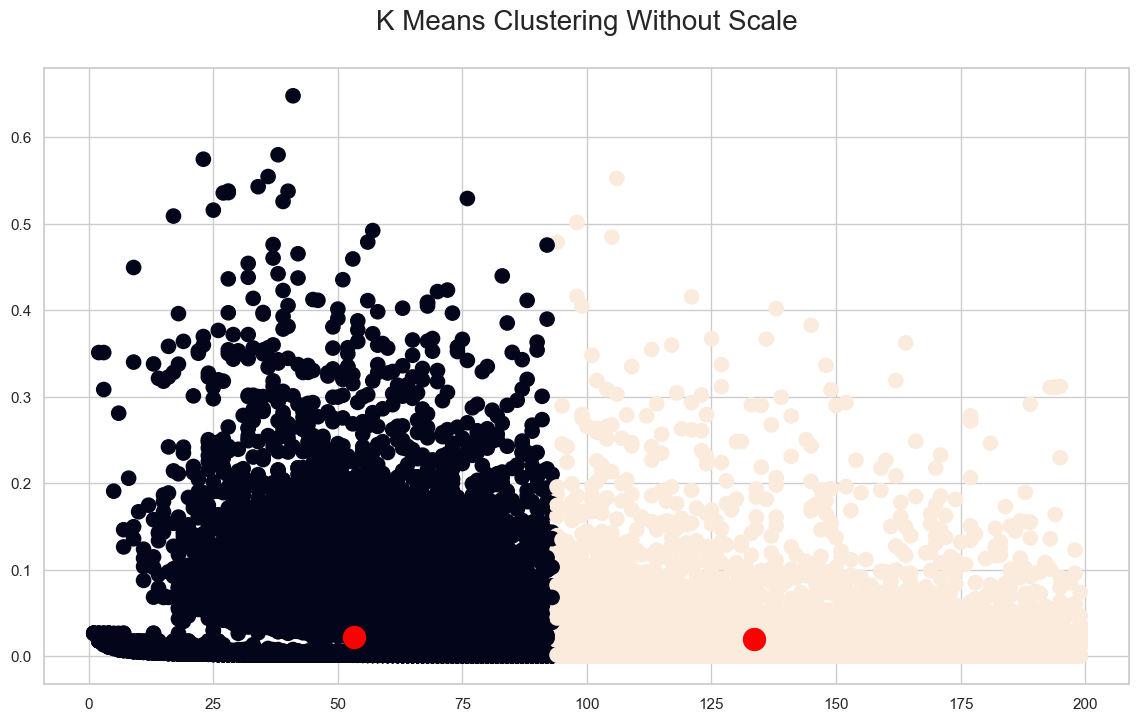

In [48]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('K Means Clustering Without Scale\n', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

I am unable to interpret this scatter plot. I know that it is applying KMeans clustering with k=2 but I do not know which two features it is using from the dataset. The red dots represent the cluster centroids and we can clearly see that the data has been grouped into two distinct clusters. 

# K Means Clustering with Scaling

In [49]:
# create an Elbow Plot of WCSS on scaled values

# create and use the standard scaler object to ensure all variables have equal range

scaler = StandardScaler()

# fit and transform to create a scaled version of 'X1'

X1_scaled = scaler.fit_transform(X1)

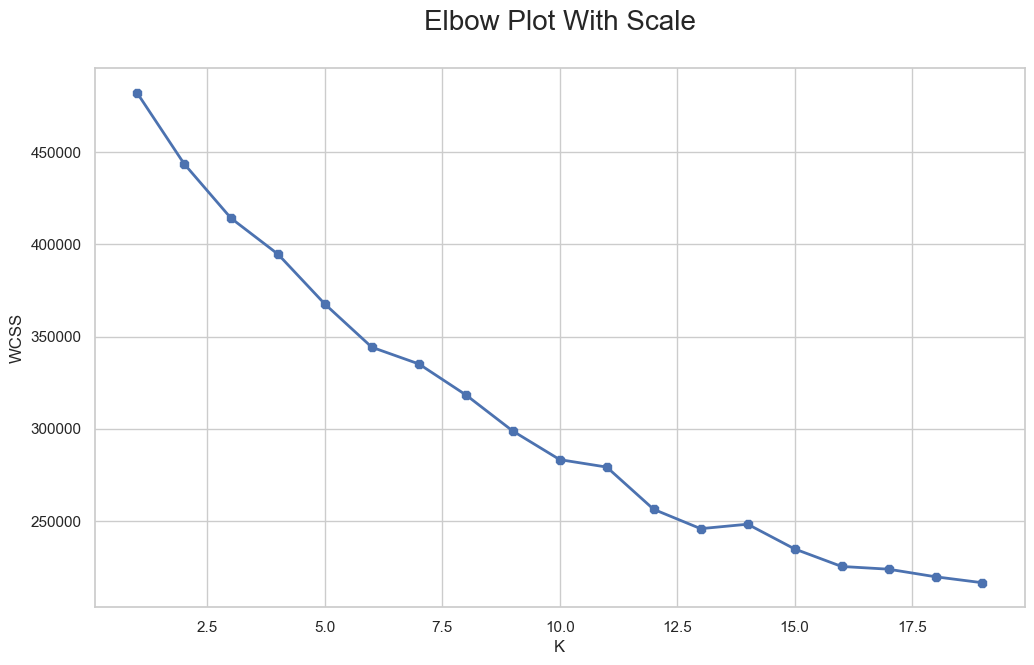

In [50]:
wcss_scaled = []
for k in range(1, 20):
    # TODO: create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++')

    # fit your kmeans algorithm on your scaled dataset
    kmeans.fit(X1_scaled)

    # append the WCSS aka inertia to your wcss_scaled list
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 20), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Elbow Plot With Scale\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

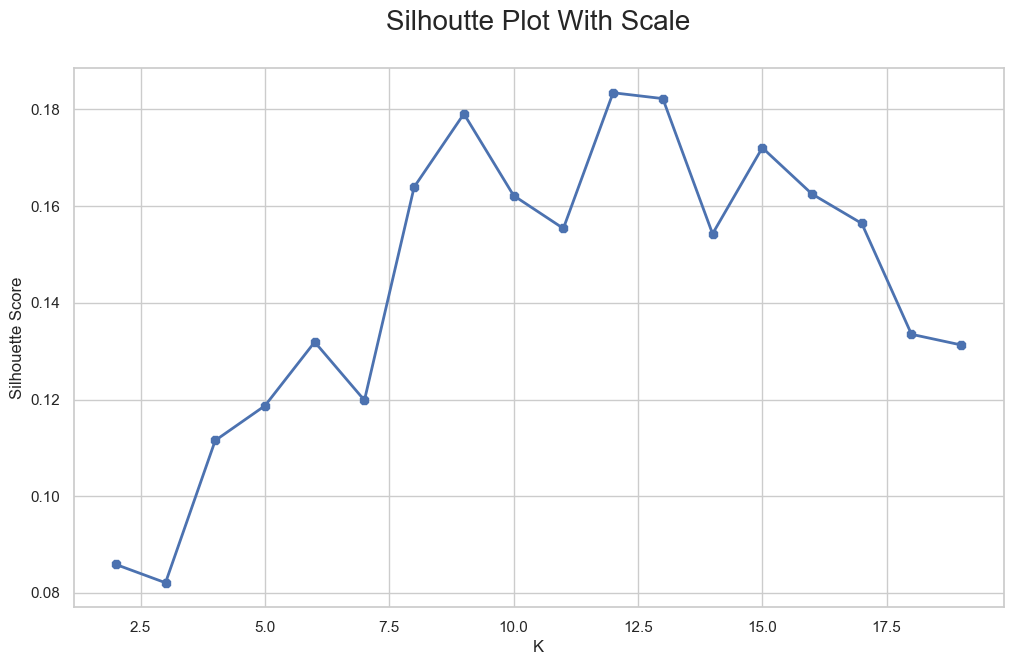

In [51]:
# create a plot of silhoutte score

silhouette_scaled = []
for k in range(2, 20):
    # create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    
    predictions = kmeans.fit_predict(X1_scaled)
    silhouette_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 20), silhouette_scaled, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot With Scale\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

While the Elbow Plot shows a k of approximately 4 or 5, the Silhouette Plots shows a k of approximately 11. I tend to lean towards Silhouette Plots more than Elbows, so I will move forward with k = 11. 

In [52]:
# create a new KMeans object with this optimal number of clusters. Name this object `kmeans_scaled`

kmeans_scaled = KMeans(n_clusters =11, init='k-means++', n_init=20, random_state=42)

# fit this KMeans object on your data

kmeans_scaled.fit(X1_scaled)

KMeans(n_clusters=11, n_init=20, random_state=42)

In [53]:
#nGenerate labels for the  dataset

labels = kmeans_scaled.fit_predict(X1_scaled)
labels

array([10,  5,  1, ...,  3,  3,  3], dtype=int32)

In [54]:
# output the centroids of your clusters

kmeans_scaled.cluster_centers_

array([[ 1.32946011e-01, -2.36190684e-01,  8.68747183e-02,
        -1.20824511e-01, -2.00872899e-01, -1.76257069e-01,
        -8.92371311e-02, -2.70511869e-01, -4.16347633e-01,
        -6.01395761e-03, -1.50964452e-01,  2.86268901e+00,
        -2.12868462e-01, -1.00420849e-01, -2.63980647e-01,
        -2.50028743e-01,  3.41264539e-02],
       [-2.41527653e-01, -1.35861045e-01, -4.56460673e-01,
        -4.18913277e-01, -2.24455881e-01, -6.95019835e-02,
        -6.09053799e-02, -2.02942165e-01, -9.14823731e-02,
        -3.87694362e-01,  2.89282493e+00, -7.75459995e-02,
         2.06001254e-01,  1.11957935e-01, -3.79929670e-01,
        -1.42010166e-01,  4.02627628e-01],
       [-2.16588246e-01,  4.18589768e+00, -3.22075482e-01,
        -1.69012077e-01,  2.22161507e-02,  8.59383693e-02,
        -3.24166693e-02,  4.85942186e-02, -2.79474170e-01,
        -1.54019629e-01, -3.35240064e-02, -3.12975938e-01,
        -2.94053836e-01, -2.04260061e-01, -1.72914515e-02,
        -5.49471330e-02,  2.9

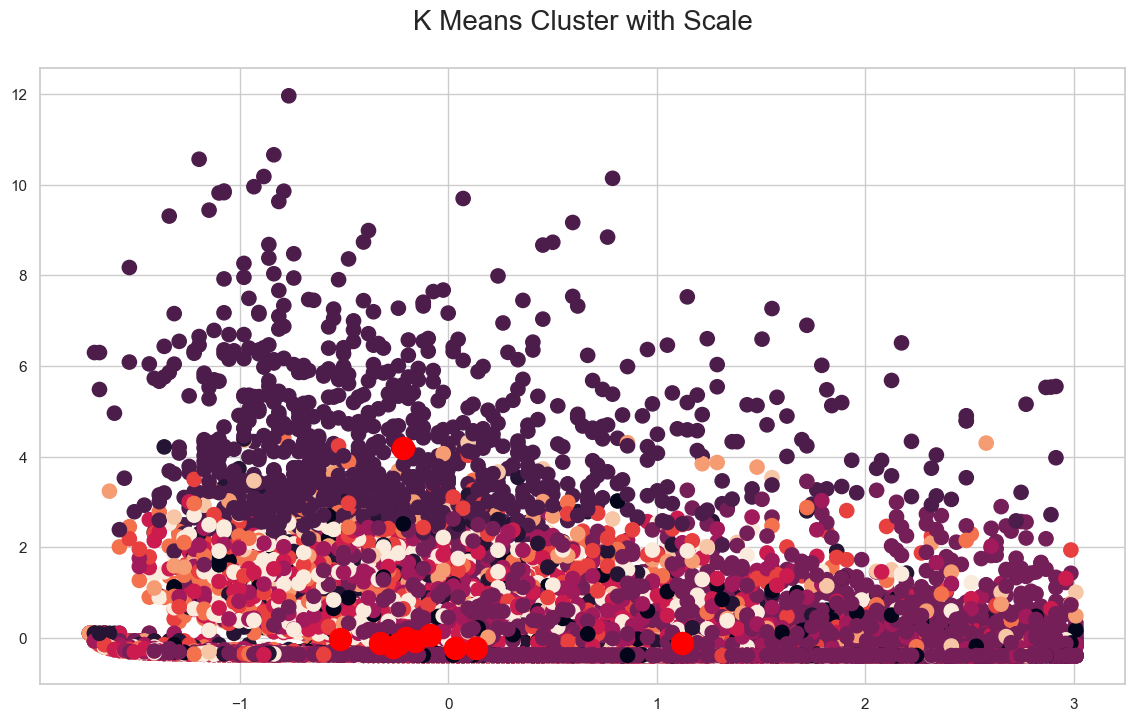

In [55]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s = 105)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('K Means Cluster with Scale\n', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

With scaling, the 2D chart looks wholly unrecognizable from it's unscaled counterpart. This chart shows a lot of overlapping. The cluster centroids are recognizable. Each point represents a different song in its respective colored cluster. There isn't much more that I can gather from this chart, but that may be due to my untrained eye. 

# Principal Component Analysis (PCA)
PCA is a technique that is used to reduce dimensionality of a dataset by standardizing the data via its mean. 

In [56]:
# set PCA components and standardize data
pca = PCA(n_components=2)
transformed_pca = pca.fit_transform(X1_scaled)

# list original features
features = ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic',
            'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual',
            'sadness', 'feelings', 'age']

# view PCA loadings for each component
pca_loadings = pd.DataFrame(pca.components_.T, index=features, columns=['PC1', 'PC2'])
pca_loadings = pca_loadings.sort_values(by='PC1', ascending=False)
print ("Top Features contributing to PC1 and PC2")

pca_loadings.head()

pca_loadings.sort_values(by='PC2', ascending=False).head()



Top Features contributing to PC1 and PC2


,PC1,PC2
dating,-0.057113,0.360579
night/time,-0.064844,0.262218
shake the audience,0.160263,0.226598
communication,-0.065786,0.206413
obscene,0.514010,0.205309


In [57]:
# set up parameters for prediction
kmeans_scaled = KMeans(n_clusters=11, init='k-means++', random_state=42)
clusters = kmeans_scaled.fit_predict(transformed_pca)

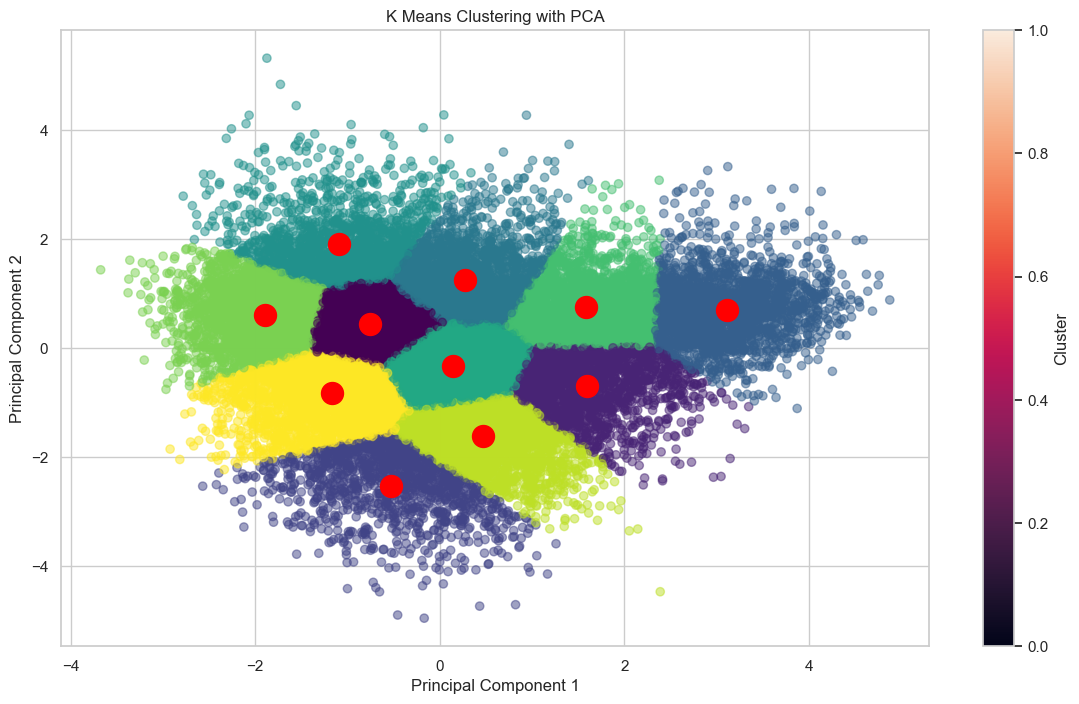

In [58]:
# plot PCA results

plt.figure(figsize=(14,8))
plt.scatter(transformed_pca[:,0], transformed_pca[:,1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_scaled.cluster_centers_[:,0], kmeans_scaled.cluster_centers_[:,1], color='red', s=250)
plt.title('K Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

I used PCA to visualize the KMeans clustering of 11. The 17 dimensional feature was reduced to 2 dimensions (`n_components`), making it easier to see the 11 clusters discovered by KMeans.

Each point in the plot is a song. 
The different colors indicate the clusters that were assigned by KMeans.
The red dots represent the cluster centroids. 

In [59]:
# fit k=11 on scaled data and add "Cluster" column to cleaned dataset
kmeans_scaled = KMeans(n_clusters=11, random_state=42)
cleaned_df['Cluster'] = kmeans_scaled.fit_predict(X1_scaled)

In [60]:
# load raw data set, and combine with cleaned_df dataset (with the additional 'Cluster' column)
df = pd.read_csv("/Users/sa18/Desktop/Unsupervised_DJ/Data/train.csv")

label = df[['genre', 'artist_name', 'track_name', 'release_date']]

label = pd.concat([label, cleaned_df], axis=1)

label.head()

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,pop,mukesh,mohabbat bhi jhoothi,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.0,4
1,pop,frankie laine,i believe,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.0,0
2,pop,johnnie ray,cry,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.0,10
3,pop,pérez prado,patricia,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.0,5
4,pop,giorgos papadopoulos,apopse eida oneiro,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.0,5


In [61]:
# Get value count for each cluster
cleaned_df['Cluster'].value_counts().sort_index().to_frame(name='Count')

,Count
Cluster,
0,4172
1,3829
2,2132
3,1827
4,2408
5,1653
6,4996
7,1009
8,950


Almost all clusters have a sizable set of songs, with the exception of Clusters 8 and 10. They are much smaller than all the others. 

In [71]:
# Describe each cluster
# Create a DataFrame of cluster centers for better understanding

columns = ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic',
           'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual',
           'sadness', 'feelings', 'age']

cluster_centers = pd.DataFrame(kmeans_scaled.cluster_centers_, columns=columns)
cluster_centers.index = [f"Cluster {i}" for i in range(len(cluster_centers))]

cluster_centers

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
Cluster 0,-0.280775,-0.199332,-0.410806,1.849362,-0.211156,-0.188622,-0.011666,-0.170554,-0.224308,-0.406045,-0.132124,-0.258465,0.151962,0.170769,-0.340738,-0.096715,0.109843
Cluster 1,1.197026,-0.104629,-0.329867,-0.434650,-0.273710,0.035861,0.033639,-0.332172,-0.154015,2.101816,-0.279814,0.024655,-0.230813,-0.137944,-0.571555,-0.184642,-0.519842
Cluster 2,0.118025,-0.239332,0.009447,-0.171256,-0.211207,-0.183886,0.005031,-0.276256,-0.404870,-0.079444,0.274803,2.668087,-0.213373,-0.110063,-0.293589,-0.244924,0.082660
Cluster 3,-0.205579,0.005276,-0.415553,-0.413326,3.058235,-0.087100,0.021303,-0.176912,-0.043360,-0.352892,-0.144537,-0.135550,-0.041942,-0.135272,-0.388812,-0.042684,0.088415
Cluster 4,-0.344900,-0.196148,-0.173389,-0.124785,-0.251797,-0.209386,-0.142389,-0.197638,2.178605,-0.262864,0.226744,-0.351790,-0.346734,-0.222324,0.079290,-0.156014,0.108294
Cluster 5,-0.515312,-0.027478,-0.511213,-0.310369,-0.166654,-0.161952,0.000631,3.340000,-0.027257,-0.458095,-0.057061,-0.302858,0.122039,-0.152113,-0.312565,-0.107960,0.639454
Cluster 6,0.009369,-0.235062,1.532061,-0.382723,-0.234655,-0.187468,0.035415,-0.263599,-0.269491,-0.383642,0.224688,-0.248195,0.309527,0.326266,-0.429209,-0.159086,-0.180892
Cluster 7,-0.231211,4.018379,-0.336802,-0.177417,-0.010740,-0.035506,0.079865,0.018880,-0.282116,-0.169959,0.198316,-0.307599,-0.289841,-0.192726,-0.052387,-0.069623,0.343258
Cluster 8,0.169001,-0.050728,-0.009220,-0.121077,-0.114742,4.033764,-0.045563,-0.178965,-0.236411,0.125401,-0.051661,-0.222690,-0.258453,-0.097461,-0.231050,-0.081112,-0.196690
Cluster 9,-0.327739,-0.135304,-0.439877,-0.355956,-0.200848,-0.194646,-0.009035,-0.115917,-0.194782,-0.422403,-0.063600,-0.271604,0.125608,-0.036352,1.744540,-0.129759,0.113623


This is a quick peek into top 3 characteristics of each cluster.

***Cluster 0***



In [ ]:
# let's take a peek into some of the clusters
label[cleaned_df['Cluster'] == 0].sample(10)

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
9823,country,emmylou harris,your long journey,1986,32,0.001815,0.001815,0.310327,0.001815,0.001815,...,0.001815,0.001815,0.001815,0.001815,0.001815,0.204856,0.226206,0.001815,0.485714,0
18362,jazz,sarah vaughan,easy living,1978,47,0.001144,0.001144,0.546755,0.001144,0.001144,...,0.192860,0.001144,0.001144,0.001144,0.001144,0.001144,0.001144,0.001144,0.600000,0
8803,country,willie nelson,amazing grace,1976,38,0.001880,0.001880,0.450495,0.001880,0.001880,...,0.001880,0.001880,0.189379,0.001880,0.116362,0.001880,0.001880,0.001880,0.628571,0
2336,pop,television,days,1978,32,0.001815,0.001815,0.622599,0.001815,0.001815,...,0.001815,0.001815,0.001815,0.001815,0.346548,0.001815,0.001815,0.001815,0.600000,0
12266,country,cody jinks,no words,2016,44,0.001350,0.001350,0.494294,0.001350,0.001350,...,0.266413,0.001350,0.001350,0.077851,0.001350,0.001350,0.118900,0.023649,0.057143,0
27176,rock,palace,live well,2016,84,0.000822,0.000822,0.618337,0.020544,0.000822,...,0.000822,0.000822,0.000822,0.000822,0.128690,0.020237,0.000822,0.000822,0.057143,0
21453,reggae,black uhuru,black uhuru anthem,1984,186,0.000797,0.288774,0.541608,0.025512,0.000797,...,0.000797,0.000797,0.000797,0.000797,0.017749,0.046023,0.049430,0.000797,0.514286,0
9382,country,"crosby, stills & nash",too much love to hide,1982,64,0.000849,0.078043,0.452071,0.000849,0.000849,...,0.082251,0.000849,0.040182,0.000849,0.000849,0.000849,0.225489,0.048951,0.542857,0
10307,country,diamond rio,i believe,1991,61,0.000877,0.100822,0.386740,0.027948,0.000877,...,0.000877,0.000877,0.000877,0.000877,0.140482,0.000877,0.104176,0.077648,0.414286,0
9523,country,lee greenwood,i.o.u.,1983,54,0.001196,0.001196,0.362625,0.065238,0.001196,...,0.199656,0.001196,0.001196,0.001196,0.001196,0.001196,0.130818,0.089731,0.528571,0


In [ ]:
label[cleaned_df['Cluster'] == 1]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
10,pop,liva weel,"drømmer man om den, vågner..",1951,113,0.017090,0.026486,0.000774,0.000774,0.000774,...,0.079665,0.720557,0.080988,0.000774,0.065153,0.000774,0.000774,0.000774,0.985714,1
12,pop,frankie laine,necessary evil,1951,173,0.000627,0.244358,0.083570,0.000627,0.013375,...,0.109129,0.458984,0.000627,0.000627,0.000627,0.000627,0.000627,0.032581,0.985714,1
27,pop,asha bhosle,gullyachi shapath,1952,127,0.000693,0.040706,0.000693,0.028726,0.000693,...,0.000693,0.688167,0.000693,0.064938,0.122569,0.000693,0.000693,0.000693,0.971429,1
64,pop,ted heath,believe in me,1956,121,0.057984,0.000578,0.000578,0.000578,0.024864,...,0.141719,0.588776,0.000578,0.000578,0.141685,0.000578,0.000578,0.000578,0.914286,1
66,pop,lata mangeshkar,pahuni raghunandan savala,1956,46,0.002924,0.002924,0.002924,0.002924,0.002924,...,0.183700,0.667948,0.002924,0.002924,0.002924,0.002924,0.002924,0.101568,0.914286,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28356,hip hop,the roots,the seed (2.0),2019,61,0.001224,0.001224,0.105172,0.001224,0.001224,...,0.001224,0.325359,0.001224,0.001224,0.165883,0.001224,0.001224,0.001224,0.014286,1
28358,hip hop,m.o.p.,ante up (robbin hoodz theory),2019,67,0.001284,0.001284,0.035338,0.001284,0.001284,...,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,0.014286,1
28359,hip hop,nine,whutcha want?,2019,77,0.001504,0.154302,0.168988,0.001504,0.039755,...,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,0.014286,1
28360,hip hop,will smith,switch,2019,67,0.001196,0.001196,0.001196,0.001196,0.048359,...,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,0.014286,1


In [ ]:
label[cleaned_df['Cluster'] == 2]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
37,pop,t. m. soundararajan,ethanai periya,1953,74,0.001253,0.066192,0.335708,0.001253,0.027847,...,0.001253,0.001253,0.001253,0.382074,0.001253,0.055239,0.001253,0.001253,0.957143,2
49,pop,harry belafonte,mark twain,1954,64,0.002392,0.002392,0.002392,0.002392,0.002392,...,0.002392,0.002392,0.378403,0.370635,0.115315,0.002392,0.002392,0.002392,0.942857,2
50,pop,harry belafonte,the next big river,1954,112,0.001645,0.375904,0.172299,0.001645,0.001645,...,0.001645,0.001645,0.001645,0.238618,0.001645,0.001645,0.001645,0.001645,0.942857,2
60,pop,bill haley & his comets,two hound dogs,1955,156,0.000612,0.000612,0.000612,0.000612,0.012723,...,0.000612,0.000612,0.358619,0.173299,0.013151,0.000612,0.000612,0.000612,0.928571,2
65,pop,ted heath,take the “a” train,1956,199,0.000516,0.000516,0.000516,0.000516,0.000516,...,0.136611,0.304397,0.020922,0.483828,0.000516,0.000516,0.000516,0.000516,0.914286,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28318,hip hop,afroman,crazy rap (colt 45 & 2 zig zags),2019,140,0.027323,0.000572,0.000572,0.024718,0.000572,...,0.000572,0.364163,0.025880,0.287471,0.099398,0.000572,0.000572,0.000572,0.014286,2
28326,hip hop,big k.r.i.t.,king of the south,2019,68,0.001032,0.001032,0.052178,0.001032,0.001032,...,0.001032,0.354437,0.001032,0.420015,0.103657,0.001032,0.001032,0.001032,0.014286,2
28350,hip hop,nappy roots,blowin' trees,2019,74,0.001196,0.125810,0.353286,0.001196,0.001196,...,0.001196,0.040241,0.153930,0.207573,0.001196,0.001196,0.001196,0.001196,0.014286,2
28355,hip hop,nappy roots,country boyz,2019,109,0.000810,0.000810,0.000810,0.000810,0.000810,...,0.000810,0.394272,0.000810,0.515379,0.000810,0.000810,0.000810,0.000810,0.014286,2


In [ ]:
label[cleaned_df['Cluster'] == 3]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
11,pop,the chordettes,carolina moon,1951,38,0.001645,0.001645,0.001645,0.397490,0.001645,...,0.066201,0.001645,0.093699,0.001645,0.417938,0.001645,0.001645,0.001645,0.985714,3
25,pop,lata mangeshkar,paas nahin aaiye haath na lagaiye,1952,18,0.002924,0.002924,0.002924,0.319657,0.002924,...,0.002924,0.002924,0.260384,0.002924,0.002924,0.002924,0.199746,0.002924,0.971429,3
39,pop,andy williams,it's the most wonderful time of the year,1953,79,0.001253,0.060214,0.001253,0.323077,0.001253,...,0.001253,0.089849,0.260828,0.001253,0.086128,0.038310,0.001253,0.022646,0.957143,3
61,pop,les paul,sleep,1955,51,0.001253,0.001253,0.001253,0.326881,0.001253,...,0.001253,0.001253,0.135853,0.001253,0.160594,0.001253,0.191683,0.001253,0.928571,3
67,pop,bill haley & his comets,come rock with me,1956,103,0.001224,0.001224,0.001224,0.400464,0.001224,...,0.001224,0.001224,0.001224,0.001224,0.077885,0.116306,0.001224,0.046509,0.914286,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27831,hip hop,rayess bek,baghdad,2013,62,0.001074,0.154305,0.309147,0.369730,0.001074,...,0.150707,0.001074,0.001074,0.001074,0.001074,0.001074,0.001074,0.001074,0.100000,3
28039,hip hop,trina,100%,2017,75,0.001144,0.001144,0.001144,0.341296,0.044868,...,0.200939,0.186500,0.001144,0.001144,0.001144,0.001144,0.001144,0.029447,0.042857,3
28093,hip hop,vince staples,big fish,2017,59,0.001385,0.001385,0.001385,0.394986,0.001385,...,0.001385,0.171280,0.001385,0.277829,0.001385,0.001385,0.001385,0.001385,0.042857,3
28135,hip hop,kelly rowland,wonderful christmas time,2017,32,0.002770,0.002770,0.002770,0.608259,0.002770,...,0.002770,0.002770,0.064405,0.002770,0.069907,0.068149,0.002770,0.044116,0.042857,3
